## Data Exploration

Total events: 2756101
Unique users: 1407580
Unique items: 235061
Event types:
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64
Date range: 2015-05-03 03:00:04.384000 to 2015-09-18 02:59:47.788000
Median events per user: 1.0
Mean events per user: 1.96
Top 10 items:
itemid
187946    3412
461686    2978
5411      2334
370653    1854
219512    1800
257040    1647
298009    1642
96924     1633
309778    1628
384302    1608
dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

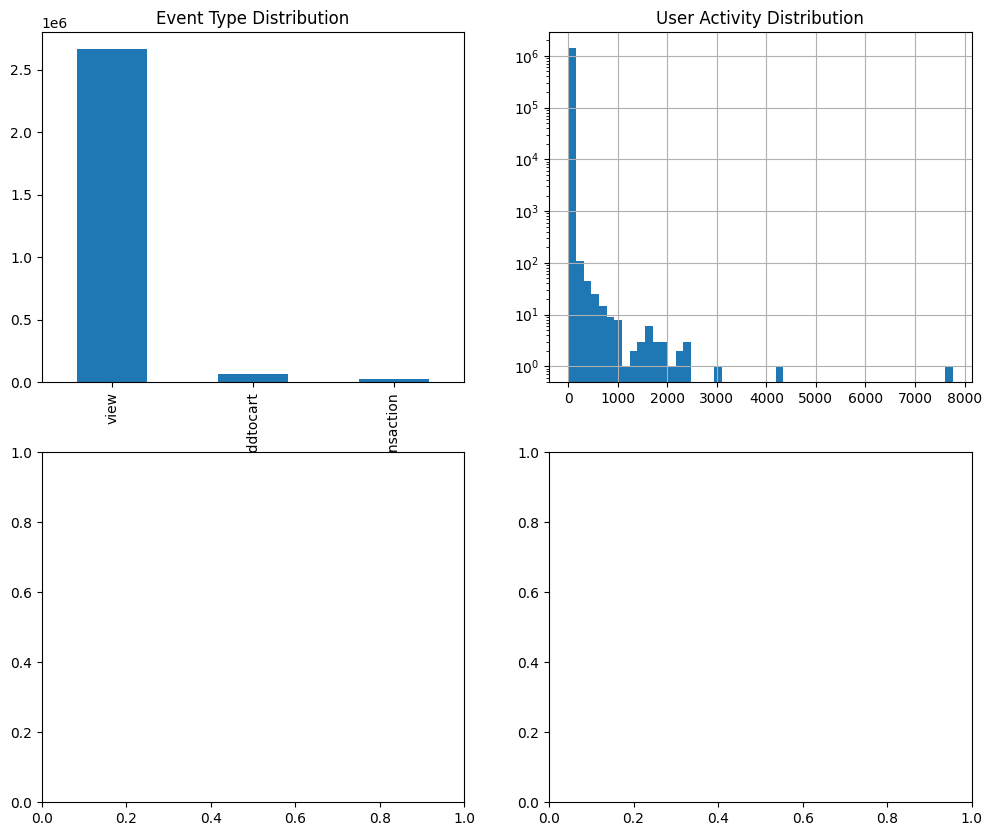

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
events = pd.read_csv('../data/raw/events.csv')

# Basic statistics
print(f"Total events: {len(events)}")
print(f"Unique users: {events['visitorid'].nunique()}")
print(f"Unique items: {events['itemid'].nunique()}")
print(f"Event types:\n{events['event'].value_counts()}")

# Time range
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')
print(f"Date range: {events['timestamp'].min()} to {events['timestamp'].max()}")

# User activity distribution
user_activity = events.groupby('visitorid').size()
print(f"Median events per user: {user_activity.median()}")
print(f"Mean events per user: {user_activity.mean():.2f}")

# Item popularity distribution
item_popularity = events.groupby('itemid').size().sort_values(ascending=False)
print(f"Top 10 items:\n{item_popularity.head(10)}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Event types
events['event'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Event Type Distribution')

# User activity (log scale)
user_activity.hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('User Activity Distribution')

# Item popularity (long tail)
item_popularity.values[:1000].plot(ax=axes[1, 0])
axes[1, 0].set_title('Item Popularity (Long Tail)')
axes[1, 0].set_ylabel('Number of interactions')

# Events over time
events.set_index('timestamp').resample('D')['event'].count().plot(ax=axes[1, 1])
axes[1, 1].set_title('Events Over Time')

plt.tight_layout()
plt.savefig('../data/exploration.png')